<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Gender-Classification-Project-/blob/master/Gender_Classification_Using_Early_Stopping_and_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading DataSet**

In [ ]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam
from skimage.transform import resize
# Importing module for early stopping
from keras.callbacks import EarlyStopping

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -uq "drive/My Drive/train_n.zip"

In [ ]:
# read the data
data = pd.read_csv("train.csv")

In [ ]:
# Create random number generator
seed = 42

In [ ]:
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [ ]:
# Distribution of classes in the dataset
data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
  # loading the image using its name
  img = plt.imread('images/' + img_name)

  # saving each image in the list
  X.append(img)

# Converting the list of images into array
X = np.array(X)

# Storing the target variable in saperate variable
y = data['class'].values

In [ ]:
# shape of the image
X.shape, y.shape

((12196, 224, 224, 3), (12196,))

In [ ]:
# Convert 3 dimensional images into 1 dimensional
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [ ]:
# Minimum and maximum pixel value of images
X.min(), X.max()

(0, 255)

# **Creating tarining and validation set**

In [ ]:
# Creating training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state= seed)

In [ ]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 150528), (8537,)), ((3659, 150528), (3659,)))

# **Using Early Stopping**

# **Defining the model architecture**

In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam

In [ ]:
# Defining the adam optimezer and setting the learning rate 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))


# Compling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Importing module for early stopping
from keras.callbacks import EarlyStopping

In [ ]:
# Setting up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

# **Training the model using Early Stopping**

In [ ]:
# Training the model fro 100 epochs

# Defining the early stopping as call back using call back parameter of model fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
67/67 [==============================] - 2s 32ms/step - loss: 0.6946 - accuracy: 0.4974 - val_loss: 0.6966 - val_accuracy: 0.5157
Epoch 2/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6938 - accuracy: 0.5127 - val_loss: 0.6933 - val_accuracy: 0.5157
Epoch 3/100
67/67 [==============================] - 2s 30ms/step - loss: 0.6940 - accuracy: 0.5086 - val_loss: 0.6958 - val_accuracy: 0.4843
Epoch 4/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6953 - accuracy: 0.5009 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 5/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6966 - accuracy: 0.4920 - val_loss: 0.6970 - val_accuracy: 0.4843
Epoch 6/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6940 - accuracy: 0.4906 - val_loss: 0.6929 - val_accuracy: 0.5157


# **Evaluating model performance**

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.5157146761410222 %


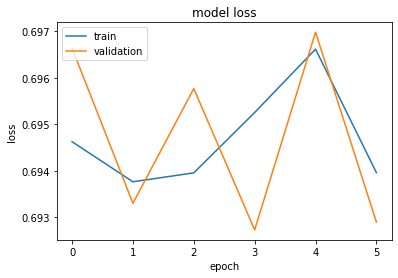

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Hyperparameter tuning for Early Stopping**

In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))


# Compling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Increase the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [ ]:
# Training the model fro 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
67/67 [==============================] - 2s 33ms/step - loss: 0.6987 - accuracy: 0.4989 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 2/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6952 - accuracy: 0.4931 - val_loss: 0.6972 - val_accuracy: 0.4843
Epoch 3/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6938 - accuracy: 0.5051 - val_loss: 0.6934 - val_accuracy: 0.4846
Epoch 4/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6953 - accuracy: 0.5010 - val_loss: 0.6944 - val_accuracy: 0.5157
Epoch 5/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6937 - accuracy: 0.5045 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 6/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6943 - accuracy: 0.4913 - val_loss: 0.6955 - val_accuracy: 0.5157
Epoch 7/100
67/67 [==============================] - 2s 29ms/step - loss: 0.6936 - accuracy: 0.5028 - val_loss: 0.6931 - val_accuracy: 0.5157
Epoch 

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.5157146761410222 %


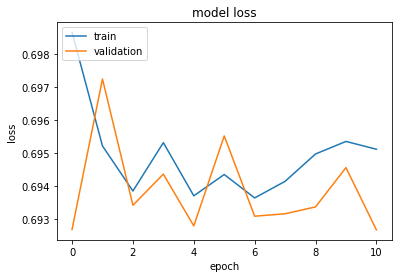

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Using DropOut**

# **Define the model Architecture and Adding Dropout layer**

In [ ]:
# Importing Dropout layer
from keras.layers import Dropout

In [ ]:
# Defining the model architecture with dropout layer
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Defining the adam optimezer and setting the learning rate 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training the model using Dropout**

In [ ]:
# Training the model fro 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/100
67/67 [==============================] - 2s 33ms/step - loss: 0.7971 - accuracy: 0.4968 - val_loss: 0.6979 - val_accuracy: 0.5157
Epoch 2/100
67/67 [==============================] - 2s 29ms/step - loss: 0.7833 - accuracy: 0.5107 - val_loss: 0.6948 - val_accuracy: 0.5157
Epoch 3/100
67/67 [==============================] - 2s 30ms/step - loss: 0.7938 - accuracy: 0.5006 - val_loss: 0.6935 - val_accuracy: 0.5157
Epoch 4/100
67/67 [==============================] - 2s 29ms/step - loss: 0.7924 - accuracy: 0.4895 - val_loss: 0.6929 - val_accuracy: 0.5157
Epoch 5/100
67/67 [==============================] - 2s 29ms/step - loss: 0.7844 - accuracy: 0.5017 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 6/100
67/67 [==============================] - 2s 30ms/step - loss: 0.7846 - accuracy: 0.4972 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 7/100
67/67 [==============================] - 2s 29ms/step - loss: 0.7899 - accuracy: 0.4960 - val_loss: 0.6928 - val_accuracy: 0.5157
Epoch 

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.48401202514348185 %


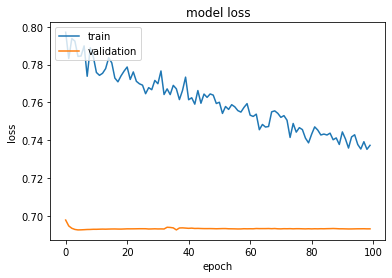

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Using Vanishing/Exploading Gradients**

# **Defining the model Architecture and Compile the model**

In [ ]:
# Defining the model architecture
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam
# Defining the adam optimezer and setting the learning rate 10^-5 and adding clip value to clip the gradients
# Clip is the gradients value
adam = Adam(lr=1e-5, clipvalue=1)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training the model**

In [ ]:
# Training the model fro 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/100
67/67 [==============================] - 2s 37ms/step - loss: 0.6968 - accuracy: 0.4978 - val_loss: 0.6966 - val_accuracy: 0.4843
Epoch 2/100
67/67 [==============================] - 2s 31ms/step - loss: 0.6943 - accuracy: 0.4978 - val_loss: 0.6946 - val_accuracy: 0.4843
Epoch 3/100
67/67 [==============================] - 2s 32ms/step - loss: 0.6935 - accuracy: 0.4978 - val_loss: 0.6936 - val_accuracy: 0.4843
Epoch 4/100
67/67 [==============================] - 2s 31ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4846
Epoch 5/100
67/67 [==============================] - 2s 31ms/step - loss: 0.6932 - accuracy: 0.4939 - val_loss: 0.6931 - val_accuracy: 0.4846
Epoch 6/100
67/67 [==============================] - 2s 31ms/step - loss: 0.6931 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5160
Epoch 7/100
67/67 [==============================] - 2s 31ms/step - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6930 - val_accuracy: 0.5160
Epoch 

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.5159879748565182 %


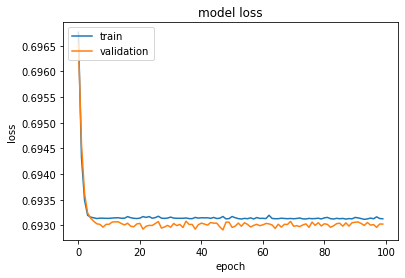

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

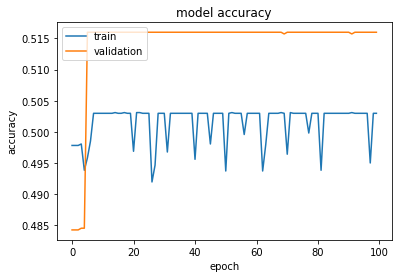

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Setting up Different weight Initialization Technique**

In [ ]:
# Importing Different Initialization technique
from keras.initializers import random_normal, glorot_normal, he_normal

In [ ]:
# Defining the model architecture
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed)))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed)))


In [ ]:
# Importing the adam optimizers from keras optimizer model
from keras.optimizers import Adam
# Defining the adam optimezer and setting the learning rate 10^-5
# Clip is the gradients value
adam = Adam(lr=1e-5)

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# Training the model fro 50 epochs

model_history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/200
67/67 [==============================] - 2s 33ms/step - loss: 0.6923 - accuracy: 0.5061 - val_loss: 0.6918 - val_accuracy: 0.5346
Epoch 2/200
67/67 [==============================] - 2s 29ms/step - loss: 0.6914 - accuracy: 0.5744 - val_loss: 0.6909 - val_accuracy: 0.6026
Epoch 3/200
67/67 [==============================] - 2s 29ms/step - loss: 0.6907 - accuracy: 0.6108 - val_loss: 0.6905 - val_accuracy: 0.6193
Epoch 4/200
67/67 [==============================] - 2s 30ms/step - loss: 0.6907 - accuracy: 0.5951 - val_loss: 0.6907 - val_accuracy: 0.6133
Epoch 5/200
67/67 [==============================] - 2s 30ms/step - loss: 0.6904 - accuracy: 0.6307 - val_loss: 0.6900 - val_accuracy: 0.6403
Epoch 6/200
67/67 [==============================] - 2s 30ms/step - loss: 0.6897 - accuracy: 0.6338 - val_loss: 0.6895 - val_accuracy: 0.6218
Epoch 7/200
67/67 [==============================] - 2s 30ms/step - loss: 0.6899 - accuracy: 0.5544 - val_loss: 0.6893 - val_accuracy: 0.5797
Epoch 

In [ ]:
# Accuracy on Training set
from sklearn.metrics import accuracy_score
print('Accuracy on Training set:', accuracy_score(y_train, model.predict_classes(X_train)[:,0]), '%')

Accuracy on Training set: 0.7396040763734333 %


In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.7373599344083083 %


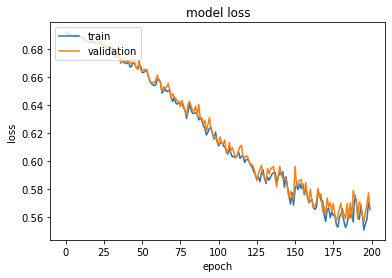

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

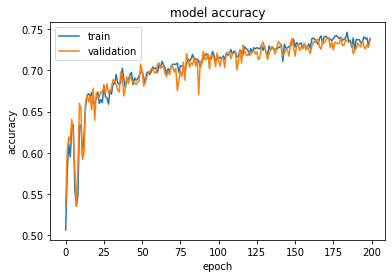

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()